In [1]:
#라이브러리 import 
import pandas as pd 
import numpy as np  
import seaborn as sns 
import matplotlib.pyplot as plt 

import random
import os 
import warnings
warnings.filterwarnings('ignore')

In [2]:
def seed_everything(seed: int = 42):
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
seed_everything(42)

In [3]:
#!pip install -q catboost shap

# 1. 데이터 전처리

In [4]:
#데이터 불러오기
df = pd.read_csv('./data/train.csv')
df = df.drop([20327,28088] , axis=0).reset_index(drop = True) #이상치 처리 
df.head()

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,...,term1,open_acc,installment,revol_util,out_prncp,out_prncp_inv,total_rec_int,fico_range_low,fico_range_high,depvar
0,0.0824,21000.0,29.19,0,1,0,3016,26,0,0,...,1,18,37.74,0.076,0.0,0.0,157.94,765,769,0
1,0.1299,80000.0,4.82,0,1,1,5722,24,0,0,...,1,8,269.52,0.447,0.0,0.0,1702.42,665,669,0
2,0.1299,38000.0,23.66,0,3,0,6511,18,0,0,...,1,7,168.45,0.880,0.0,0.0,1066.64,670,674,0
3,0.1367,100000.0,16.27,4,2,0,6849,30,0,0,...,1,12,510.27,0.457,0.0,0.0,1256.24,680,684,1
4,0.1269,30000.0,25.28,0,1,2,8197,12,0,0,...,1,8,335.45,0.416,0.0,0.0,871.04,660,664,1


In [5]:
#데이터 중복 확인
df.duplicated(keep = 'first').sum()

0

In [6]:
df = df.drop('purpose4' , axis = 1)
df

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,...,term1,open_acc,installment,revol_util,out_prncp,out_prncp_inv,total_rec_int,fico_range_low,fico_range_high,depvar
0,0.0824,21000.0,29.19,0,1,0,3016,26,0,0,...,1,18,37.74,0.076,0.0,0.0,157.94,765,769,0
1,0.1299,80000.0,4.82,0,1,1,5722,24,0,0,...,1,8,269.52,0.447,0.0,0.0,1702.42,665,669,0
2,0.1299,38000.0,23.66,0,3,0,6511,18,0,0,...,1,7,168.45,0.880,0.0,0.0,1066.64,670,674,0
3,0.1367,100000.0,16.27,4,2,0,6849,30,0,0,...,1,12,510.27,0.457,0.0,0.0,1256.24,680,684,1
4,0.1269,30000.0,25.28,0,1,2,8197,12,0,0,...,1,8,335.45,0.416,0.0,0.0,871.04,660,664,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,0.1757,65000.0,17.67,0,3,1,11255,21,1,0,...,1,13,718.75,0.780,0.0,0.0,5373.29,660,664,1
99994,0.0890,65000.0,2.88,0,0,0,2105,12,0,0,...,1,7,190.52,0.120,0.0,0.0,835.66,765,769,0
99995,0.1349,46000.0,32.12,0,1,0,8998,20,0,0,...,1,19,217.16,0.643,0.0,0.0,1261.67,665,669,0
99996,0.2115,31000.0,4.53,0,1,0,3875,4,0,0,...,1,3,207.64,0.731,0.0,0.0,1357.69,710,714,1


In [7]:
#feature importance 기준 0에 가까운 변수 제거 
drop_col = ['funded_amnt_inv' , 'home_ownership1' , 'home_ownership3' , 'home_ownership4' , 'out_prncp_inv']
df = df.drop(drop_col , axis = 1)
df

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,...,total_rec_late_fee,term1,open_acc,installment,revol_util,out_prncp,total_rec_int,fico_range_low,fico_range_high,depvar
0,0.0824,21000.0,29.19,0,1,0,3016,26,0,0,...,0.0,1,18,37.74,0.076,0.0,157.94,765,769,0
1,0.1299,80000.0,4.82,0,1,1,5722,24,0,0,...,0.0,1,8,269.52,0.447,0.0,1702.42,665,669,0
2,0.1299,38000.0,23.66,0,3,0,6511,18,0,0,...,0.0,1,7,168.45,0.880,0.0,1066.64,670,674,0
3,0.1367,100000.0,16.27,4,2,0,6849,30,0,0,...,0.0,1,12,510.27,0.457,0.0,1256.24,680,684,1
4,0.1269,30000.0,25.28,0,1,2,8197,12,0,0,...,0.0,1,8,335.45,0.416,0.0,871.04,660,664,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,0.1757,65000.0,17.67,0,3,1,11255,21,1,0,...,0.0,1,13,718.75,0.780,0.0,5373.29,660,664,1
99994,0.0890,65000.0,2.88,0,0,0,2105,12,0,0,...,0.0,1,7,190.52,0.120,0.0,835.66,765,769,0
99995,0.1349,46000.0,32.12,0,1,0,8998,20,0,0,...,0.0,1,19,217.16,0.643,0.0,1261.67,665,669,0
99996,0.2115,31000.0,4.53,0,1,0,3875,4,0,0,...,0.0,1,3,207.64,0.731,0.0,1357.69,710,714,1


In [8]:
df.columns

Index(['int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'pub_rec', 'revol_bal', 'total_acc', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens', 'emp_length1',
       'emp_length2', 'emp_length3', 'emp_length4', 'emp_length5',
       'emp_length6', 'emp_length7', 'emp_length8', 'emp_length9',
       'emp_length10', 'emp_length11', 'emp_length12', 'home_ownership2',
       'home_ownership5', 'home_ownership6', 'verification_status1',
       'verification_status2', 'verification_status3', 'purpose1', 'purpose2',
       'purpose3', 'purpose5', 'purpose6', 'purpose7', 'purpose8', 'purpose9',
       'purpose10', 'purpose11', 'purpose12', 'purpose13', 'purpose14',
       'initial_list_status1', 'initial_list_status2',
       'mths_since_last_delinq1', 'mths_since_last_delinq2',
       'mths_since_last_delinq3', 'mths_since_last_delinq4',
       'mths_since_last_delinq5', '

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99998 entries, 0 to 99997
Data columns (total 70 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   int_rate                    99998 non-null  float64
 1   annual_inc                  99998 non-null  float64
 2   dti                         99998 non-null  float64
 3   delinq_2yrs                 99998 non-null  int64  
 4   inq_last_6mths              99998 non-null  int64  
 5   pub_rec                     99998 non-null  int64  
 6   revol_bal                   99998 non-null  int64  
 7   total_acc                   99998 non-null  int64  
 8   collections_12_mths_ex_med  99998 non-null  int64  
 9   acc_now_delinq              99998 non-null  int64  
 10  tot_coll_amt                99998 non-null  int64  
 11  tot_cur_bal                 99998 non-null  int64  
 12  chargeoff_within_12_mths    99998 non-null  int64  
 13  delinq_amnt                 999

## 1-1. 파생변수 생성 
* 간접적으로 상환능력을 알 수 있는 변수 (이자상환비율) 생성 
    * 총 이자 = 대출금 * (상환기간 / 12) * 연단위 이자율
    * 총 이자 대비 상환액 비율 = 이자 상환액 / 총이자 
 

In [10]:
df.groupby('term1')[['int_rate' ,'funded_amnt' ,'installment']].mean()

,int_rate,funded_amnt,installment
term1,,,
0,0.171645,20252.259162,507.542259
1,0.123964,12638.459224,421.716431


📌 대출 상환 공식을 통해서 term1 피처의 0과 1 값이 각각 몇 개월인지 유추하기 

$$
\text{installment} = \frac{\text{funded\_amnt} \times r}{1 - (1 + r)^{- \text{term}}}
$$


- **installment** : 월 상환액  
- **funded amnt** : 대출액  
- **r** : 월 이자율  
- **term** : 상환 기간 (개월 단위)  

In [11]:
df[['int_rate' ,'funded_amnt' ,'term1' , 'installment']].iloc[0,:]

int_rate          0.0824
funded_amnt    1200.0000
term1             1.0000
installment      37.7400
Name: 0, dtype: float64

In [12]:
int_rate  = 0.0824
funded_amnt  = 1200.0000
term1 = 36  # term1 값이 36개월이라고 가정 

monthly_rate = int_rate / 12
installment = (funded_amnt * monthly_rate) / (1 - (1 + monthly_rate) ** -term1)
print(installment)

37.73664025189653


In [13]:
df['total_rec_int'].describe()

count    99998.000000
mean      2491.311157
std       2706.280374
min          0.000000
25%        857.322500
50%       1615.160000
75%       3039.165000
max      28005.960000
Name: total_rec_int, dtype: float64

In [14]:
# 이자상환비율 컬럼 생성 (만기 일시 상환 기준)
df['term']  = [36 if x == 1 else 60 for x in df['term1']]
df['tot_rec'] = df['funded_amnt'] * (df['term'] / 12) * df['int_rate'] # 총 이자 


df['rec_rate'] = df['tot_rec'] / (df['total_rec_int']+1) # 총 이자 / 지금까지 납부된 이자
df['rec_inc_rate'] = df['tot_rec'] / df['annual_inc'] # 총 이자 / 연 소득

# 총 상환금액 / 지금까지 상환된 금액 
df['fund_return'] = (df['installment'] * df['term']) / (df['funded_amnt'] - df['out_prncp'] + df['total_rec_int'] ) 


df = df.drop(['tot_rec' , 'term' ] , axis =1) 

In [15]:
# 월 상환액 대비 소득 
df['month_inc_rate'] = (df['annual_inc'] / 12) / df['installment']
# 리볼빙 잔액 / 현재 잔고 
df['bal_rate'] = (df['revol_bal'] ) / (df['tot_cur_bal']+1)
# 활성화 계좌 수 / 총 계좌 수
df['total_open_acc'] = (df['open_acc'] ) / (df['total_acc']) 

<Axes: xlabel='depvar', ylabel='total_open_acc'>

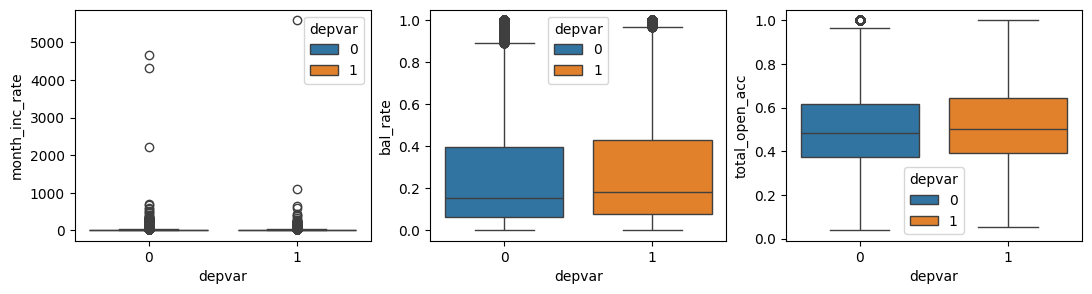

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(13, 3))
sns.boxplot(x='depvar', y= 'month_inc_rate', data=df , hue = 'depvar' , ax = ax[0]) 
sns.boxplot(x='depvar', y= 'bal_rate', data=df , hue = 'depvar' ,  ax = ax[1]) 
sns.boxplot(x='depvar', y= 'total_open_acc', data=df , hue = 'depvar' ,  ax = ax[2]) 

In [17]:
df[df['total_rec_late_fee'] > 0]['depvar'].value_counts(normalize=True)

depvar
1    0.721249
0    0.278751
Name: proportion, dtype: float64

In [18]:
df['total_rec_late_group'] = df.apply(lambda x : 1 if( x['total_rec_late_fee'] > 0)  else 0 , axis = 1) 
df

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,...,fico_range_low,fico_range_high,depvar,rec_rate,rec_inc_rate,fund_return,month_inc_rate,bal_rate,total_open_acc,total_rec_late_group
0,0.0824,21000.0,29.19,0,1,0,3016,26,0,0,...,765,769,0,1.866365,0.014126,1.000515,46.369899,0.256158,0.692308,0
1,0.1299,80000.0,4.82,0,1,1,5722,24,0,0,...,665,669,0,1.830200,0.038970,1.000031,24.735332,0.261565,0.333333,0
2,0.1299,38000.0,23.66,0,3,0,6511,18,0,0,...,670,674,0,1.825053,0.051276,0.999598,18.798852,0.204305,0.388889,0
3,0.1367,100000.0,16.27,4,2,0,6849,30,0,0,...,680,684,1,4.892861,0.061515,1.130010,16.331223,0.021006,0.400000,0
4,0.1269,30000.0,25.28,0,1,2,8197,12,0,0,...,660,664,1,4.365625,0.126900,1.110860,7.452676,0.927158,0.666667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,0.1757,65000.0,17.67,0,3,1,11255,21,1,0,...,660,664,1,1.961561,0.162185,1.019773,7.536232,0.423582,0.619048,0
99994,0.0890,65000.0,2.88,0,0,0,2105,12,0,0,...,765,769,0,1.914756,0.024646,1.003373,28.430961,0.342890,0.583333,0
99995,0.1349,46000.0,32.12,0,1,0,8998,20,0,0,...,665,669,0,2.051272,0.056306,1.020373,17.652115,0.093213,0.950000,0
99996,0.2115,31000.0,4.53,0,1,0,3875,4,0,0,...,710,714,1,2.568467,0.112573,1.090023,12.441405,0.999742,0.750000,0


In [19]:
df['fico'] = (df['fico_range_low'] + df['fico_range_high']) / 2
df= df.drop(['fico_range_high' ,'fico_range_low'] , axis = 1)
df.head()

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,...,total_rec_int,depvar,rec_rate,rec_inc_rate,fund_return,month_inc_rate,bal_rate,total_open_acc,total_rec_late_group,fico
0,0.0824,21000.0,29.19,0,1,0,3016,26,0,0,...,157.94,0,1.866365,0.014126,1.000515,46.369899,0.256158,0.692308,0,767.0
1,0.1299,80000.0,4.82,0,1,1,5722,24,0,0,...,1702.42,0,1.830200,0.038970,1.000031,24.735332,0.261565,0.333333,0,667.0
2,0.1299,38000.0,23.66,0,3,0,6511,18,0,0,...,1066.64,0,1.825053,0.051276,0.999598,18.798852,0.204305,0.388889,0,672.0
3,0.1367,100000.0,16.27,4,2,0,6849,30,0,0,...,1256.24,1,4.892861,0.061515,1.130010,16.331223,0.021006,0.400000,0,682.0
4,0.1269,30000.0,25.28,0,1,2,8197,12,0,0,...,871.04,1,4.365625,0.126900,1.110860,7.452676,0.927158,0.666667,0,662.0


In [20]:
df['fico_int_rate'] = df['fico'] / df['int_rate'] 
df['total_rec_int_rate'] = df['total_rec_int'] / df['int_rate'] 

# 2. 데이터 분리

* target 데이터 분리 
* train/test 데이터 분리 
    * stratify 를 설정하여 target이 동일한 비율로 클래스가 나눠지게 설정 

In [21]:
from sklearn.model_selection import train_test_split

target = 'depvar'

x = df.drop(target , axis = 1)
y = df[target]

In [22]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size = 0.2 , random_state= 42 , stratify=y)

print(y_train.value_counts(normalize = True))
print(y_test.value_counts(normalize = True))

depvar
0    0.674304
1    0.325696
Name: proportion, dtype: float64
depvar
0    0.6743
1    0.3257
Name: proportion, dtype: float64


target의 비율이 동일하게 나눠짐을 확인 

# 3. 불균형 데이터 처리 
* Oversampling : 다수 클래스 데이터 수에 맞춰 소수 클래스의 데이터를 생성하는 방식
* Cost-sensitive Learning(비용민감학습) : 데이터 자체를 생성하지 X, 소수 클래스의 비용함수에 높은 가중치를 두어 균형잡힌 학습을 가능하게 함 → class_weight 매개변수로 설정
* Ensemble 방법 
     * 만일 300 개의 인스턴스를 갖는 다수의 클래스와 100개의 인스턴스를 갖는 3개의 서로 다른 모델을 생성 후, voting 방식으로 예측 진행 
     * https://imbalanced-learn.org/stable/references/generated/imblearn.ensemble.BalancedBaggingClassifier.html

In [23]:
from catboost import CatBoostClassifier
from sklearn.metrics import *

In [24]:
# # 오버샘플링(SMOTE) : 0.7381 -> 0.73114
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(random_state = 0)
# x_train_new,y_train_new = smote.fit_resample(x_train, y_train)

# cat_clf = CatBoostClassifier(random_state = 42)

# cat_clf.fit(x_train_new , y_train_new , verbose = 0)
# cat_pred = cat_clf.predict(x_test)
# f1_macro =f1_score(y_test , cat_pred, average = 'macro')

# print(classification_report(y_test , cat_pred))
# print(f1_macro)

In [25]:
# class weight 설정
from sklearn.utils.class_weight import compute_class_weight

classes = classes = np.unique(y_train)
weights = compute_class_weight(class_weight = 'balanced' , classes = classes , y = y_train)
class_weights = dict(zip(classes , weights))
class_weights

{0: 0.7415049218619654, 1: 1.5351755900978699}

In [ ]:
# class_weight 설정 : 0.7381 -> 0.7392
cat_clf = CatBoostClassifier(random_state = 42 ,
                            class_weights = class_weights)

cat_clf.fit(x_train , y_train , verbose = 1)
cat_pred = cat_clf.predict(x_test)
cat_pred

f1_macro = f1_score(y_test , cat_pred, average = 'macro')
print(classification_report(y_test , cat_pred))
print(f1_macro) 

In [27]:
# #앙상블 활용 (오랜시간 소요, 약 5분) : 0.7381 -> 0.7374
# from imblearn.ensemble import BalancedBaggingClassifier

# bbc = BalancedBaggingClassifier(estimator = CatBoostClassifier(random_state = 42 , 
#                                                                verbose = 0) ,
#                                  sampling_strategy = 'auto',
#                                  random_state = 42)
# bbc.fit(x_train,y_train)
# bbc_pred = bbc.predict(x_test)
# f1_macro = f1_score(y_test , bbc_pred, average = 'macro')

# print(classification_report(y_test , bbc_pred))
# print(f1_macro)

# 4. 피처선택 (Feature Selection)  
* Feature Importance (특성 중요도) 기준 선택 

In [ ]:
# Feature Importance 계산
feature_importance = cat_clf.get_feature_importance()
feature_names = x_train.columns

# DataFrame 변환
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False) 

# 시각화 (Seaborn 활용)
plt.figure(figsize=(6, 15))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='pastel')
plt.title('CatBoost Feature Importance', fontsize=15)
plt.xlabel('Feature Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

In [29]:
importance_df 

,Feature,Importance
69,fund_return,23.656884
67,rec_rate,11.547662
73,total_rec_late_group,7.581964
60,total_rec_late_fee,3.919354
2,dti,3.676659
...,...,...
33,purpose1,0.058013
45,purpose14,0.057678
50,mths_since_last_delinq3,0.054003
37,purpose6,0.046582


* 파생변수로 생성한 변수가 예측에 있어 중요한 변수로 활용됨을 확인 
    * `fund_return` : 총 상환금액 / 지금까지 납부된 금액 
    * `rec_rate`  : 총 이자 / 지금까지 납부된 이자  
    * `total_rec_rate_group` : total_rec_rate가 0이 넘는지에 대한 여부 

* 중요도가 거의 0에 가까운 변수 
    * home_ownership1 , home_ownership3,  home_ownership4 



#  5. 앙상블 및 하이퍼파라미터 튜닝
* optuna 를 활용한 하이퍼파라미터 튜닝
* SoftVoting, HardVoting, Stacking 시도

In [30]:
# from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier

# cat_clf = CatBoostClassifier(random_state=42, 
#                              class_weights=class_weights,
#                              verbose=0 )

# xgb_clf = XGBClassifier(random_state=42, 
#                         use_label_encoder=False, 
#                         eval_metric = 'error' ,
#                         scale_pos_weight = y_test.value_counts()[0] / y_test.value_counts()[1])

# lgbm_clf = LGBMClassifier(random_state=42, 
#                           class_weight='balanced',
#                           verbose = -1)

In [ ]:
# import optuna 

# def objective(trial):
#     # 하이퍼파라미터 범위 설정
#     param = {
#         "iterations": trial.suggest_int("iterations", 100, 1000, step=50),
#         "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.5, log=True),
#         "random_seed": 42,
#         "verbose": 0,
#         "class_weights": class_weights,  
#     }

#     # 모델 학습
#     model = CatBoostClassifier(**param)
#     model.fit(x_train, y_train, verbose=0)

#     preds = model.predict(x_test)
#     f1_macro_score = f1_score(y_test, preds, average="macro")
#     return f1_macro_score

# # Optuna 스터디 생성 및 실행
# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=50)

# # 최적의 하이퍼파라미터 출력
# print("Best hyperparameters:", study.best_params)
# print("Best accuracy:", study.best_value)

In [32]:
# def objective_xgb(trial):
#     params = {
#         "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
#         "max_depth": trial.suggest_int("max_depth", 3, 10),
#         "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.3, log=True),
#         "subsample": trial.suggest_float("subsample", 0.5, 1.0),
#         "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
#         "gamma": trial.suggest_float("gamma", 0, 5),
#         "scale_pos_weight": y_train.value_counts()[0] / y_train.value_counts()[1],
#         "random_state": 42,
#         "eval_metric": "error",
#         "use_label_encoder": False
#     }
#     model = XGBClassifier(**params)
#     model.fit(x_train, y_train, eval_set=[(x_test, y_test)], early_stopping_rounds=50, verbose=0)
#     preds = model.predict(x_test)
#     return f1_score(y_test, preds, average="macro")

# # Optuna study for XGBClassifier
# study_xgb = optuna.create_study(direction="maximize")
# study_xgb.optimize(objective_xgb, n_trials=50)
# print("Best XGB params:", study_xgb.best_params)

In [33]:
# import optuna 

# def objective_lgbm(trial):
#     params = {
#         "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
#         "max_depth": trial.suggest_int("max_depth", -1, 10),
#         "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.3, log=True),
#         "num_leaves": trial.suggest_int("num_leaves", 20, 150),
#         "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
#         "subsample": trial.suggest_float("subsample", 0.5, 1.0),
#         "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
#         "random_state": 42
#     }
#     model = LGBMClassifier(**params)
#     model.fit(x_train, y_train, eval_set=[(x_test, y_test)])
#     preds = model.predict(x_test)
#     return f1_score(y_test, preds, average="macro")


# # Optuna study for LGBMClassifier
# study_lgbm = optuna.create_study(direction="maximize")
# study_lgbm.optimize(objective_lgbm, n_trials=50)
# print("Best LGBM params:", study_lgbm.best_params)

In [34]:
# # Best parameters
# print("Best XGB params:", study_xgb.best_params)
# # Best score
# print("Best XGB score:", study_xgb.best_value)

In [35]:
# # Best parameters
# print("Best LGBM params:", study_lgbm.best_params)
# # Best score
# print("Best LGBM params:", study_lgbm.best_value)

In [36]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

#best params 
cat_best_params =  {'iterations': 950, 'learning_rate': 0.10245809200640499}

xgb_best_params = {'n_estimators': 703, 
                   'max_depth': 9, 
                   'learning_rate': 0.03948704517904488,
                   'subsample': 0.7281109724667661,
                   'colsample_bytree': 0.87443340115465, 
                   'gamma': 2.6378985452975794}

lgbm_best_params =  {'n_estimators': 797, 
                     'max_depth': 7, 
                     'learning_rate': 0.0366459821922061, 
                     'num_leaves': 77, 
                     'min_child_samples': 89,
                     'subsample': 0.5729914405334258, 
                     'colsample_bytree': 0.5172347974868119}

In [37]:
from sklearn.ensemble import StackingClassifier, VotingClassifier


cat_clf = CatBoostClassifier(random_state=42, 
                             class_weights=class_weights,
                             verbose=0 ,
                              **cat_best_params)

xgb_clf = XGBClassifier(random_state=42, 
                        use_label_encoder=False, 
                        eval_metric = 'error' ,
                        scale_pos_weight = y_test.value_counts()[0] / y_test.value_counts()[1],
                        **xgb_best_params)

lgbm_clf = LGBMClassifier(random_state=42, 
                          class_weight='balanced',
                          **lgbm_best_params , 
                          verbose = -1)

In [38]:
#1. Stacking 
stack_clf = StackingClassifier(
    estimators=[
        ('cat', cat_clf),
        ('xgb', xgb_clf),
        ('lgbm', lgbm_clf)
    ],
    
    final_estimator= cat_clf
)

stack_clf.fit(x_train, y_train)
stack_pred = stack_clf.predict(x_test)
stack_f1_macro = f1_score(y_test, stack_pred, average='macro')

print("=== Stacking Classifier ===")
print(classification_report(y_test, stack_pred))
print(f"Stacking F1 Macro: {stack_f1_macro:.4f}")

=== Stacking Classifier ===
              precision    recall  f1-score   support

           0       0.88      0.73      0.80     13486
           1       0.59      0.79      0.67      6514

    accuracy                           0.75     20000
   macro avg       0.73      0.76      0.74     20000
weighted avg       0.78      0.75      0.76     20000

Stacking F1 Macro: 0.7361


In [39]:
# 2. Voting 
voting_clf = VotingClassifier(
    estimators=[
        ('cat', cat_clf),
        ('xgb', xgb_clf),
        ('lgbm', lgbm_clf)
    ],
    voting='soft' 
)

voting_clf.fit(x_train, y_train)
voting_pred = voting_clf.predict(x_test)
voting_f1_macro = f1_score(y_test, voting_pred, average='macro')

print("\n=== Soft Voting Classifier ===")
print(classification_report(y_test, voting_pred))
print(f"Voting F1 Macro: {voting_f1_macro:.4f}")


=== Soft Voting Classifier ===
              precision    recall  f1-score   support

           0       0.88      0.75      0.81     13486
           1       0.61      0.78      0.68      6514

    accuracy                           0.76     20000
   macro avg       0.74      0.77      0.75     20000
weighted avg       0.79      0.76      0.77     20000

Voting F1 Macro: 0.7462


In [40]:
# 3. Hard Voting
voting_clf = VotingClassifier(
    estimators=[
        ('cat', cat_clf),
        ('xgb', xgb_clf),
        ('lgbm', lgbm_clf)
    ],
    voting='hard' 
)

voting_clf.fit(x_train, y_train)
voting_pred = voting_clf.predict(x_test)
voting_f1_macro = f1_score(y_test, voting_pred, average='macro')

print("\n=== Hard Voting Classifier ===")
print(classification_report(y_test, voting_pred))
print(f"Voting F1 Macro: {voting_f1_macro:.4f}")


=== Hard Voting Classifier ===
              precision    recall  f1-score   support

           0       0.88      0.75      0.81     13486
           1       0.60      0.78      0.68      6514

    accuracy                           0.76     20000
   macro avg       0.74      0.76      0.74     20000
weighted avg       0.79      0.76      0.77     20000

Voting F1 Macro: 0.7437


# 6. 모델해석 

In [48]:
import shap
explainer = shap.TreeExplainer(cat_clf)
shap_values = explainer.shap_values(x_test)

[ summaryplot ] 
* 전체 feature들에 대해 shapely value가 어떤 분포를 미치는지 시각화 
* Feature Importacne + Feature Effect

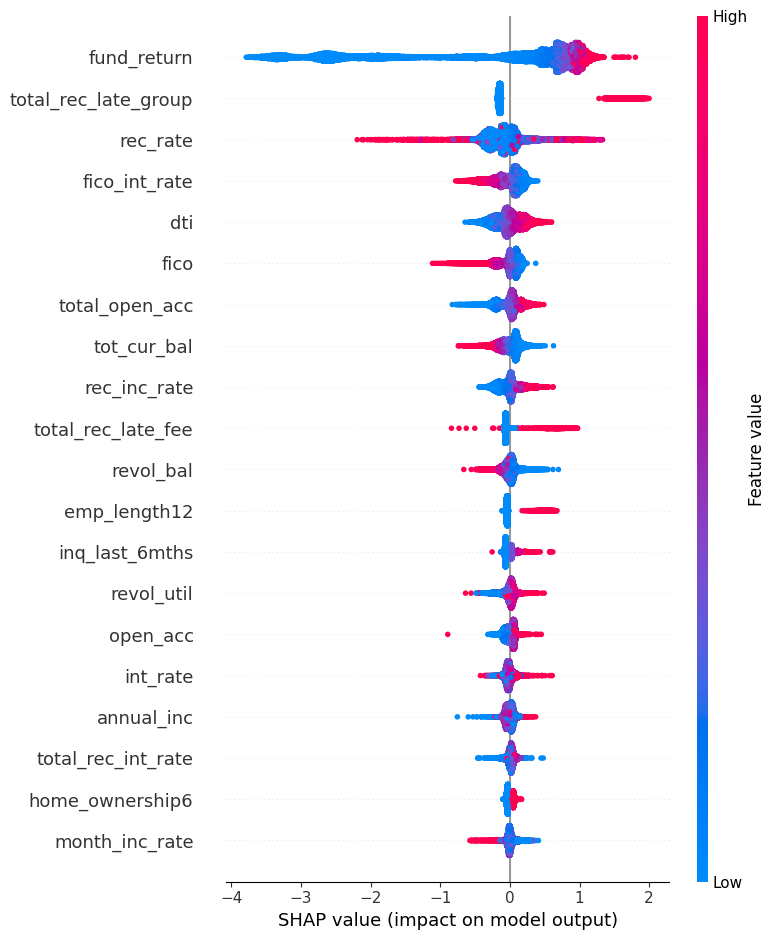

In [49]:
shap.summary_plot(shap_values , x_test)

* fund_return(상환금액비율)이 높을수록
* total_rec_int(연체료 납부금액) 가 0이 넘는 고객들이
* dti(소득 대비 부채 비율)이 높을수록
* fico(신용점수) 가 낮을수록
* int_rate(이자율)이 높을수록
* tot_cur_bal(총 계좌 잔고)이 낮을수록
* revol_bal (리볼빙 잔액)이 낮을수록 

채무 불이행에 영향을 미친다. 

[ Dependence plot ] 
* 특정 Feature에 대해 Shapley Value를 시각화
* interaction = None 으로 설정하여 단일변수와 예측값 간의 관계 파악
* 이는 해당 특성이 다른 특성과 상호작용 없이 모델 예측에 어떻게 기여하는지를 알 수 있음. 

In [ ]:
for name in x_test.columns:
    shap.dependence_plot(name , shap_values , x_test , interaction_index = None)

[ Feature Importance] 
* 각 Feature 의 Shapely Value의 절대값의 평균을 plot 함으로써, 각 Feature가 예측값에 미치는 절대 영향도를 확인

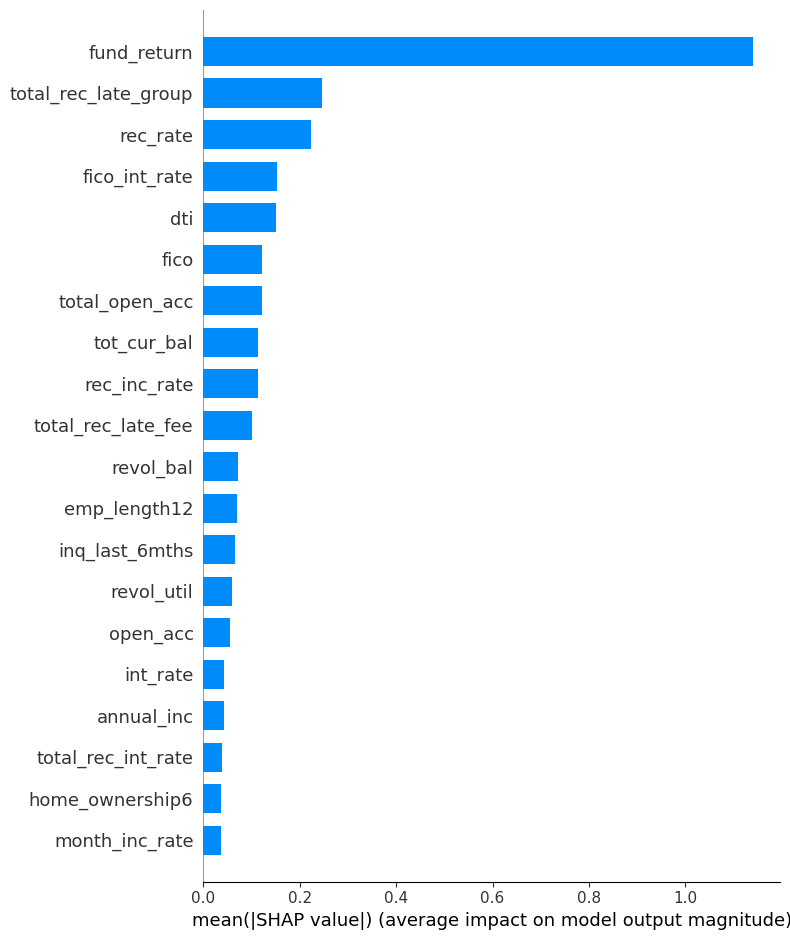

In [51]:
shap.summary_plot(shap_values , x_test , plot_type = 'bar')

* fund_return (총 상환율)
* total_rec_late_group (이체료납부 여부) 
* rec_late (이자 상환율)
위 3가지 변수가 이탈에 영향을 미치는 주요한 변수임을 확인 

[ Waterfall Plot ]
* 특정 데이터가 예측된 근거를 보여주는 Plot
* 각 feature이 모델 예측값에 대한 기여를 누적하여 보여주며, 각 bar의 크기는 해당 특성의 SHAP 값의 크기를 나타냄. 

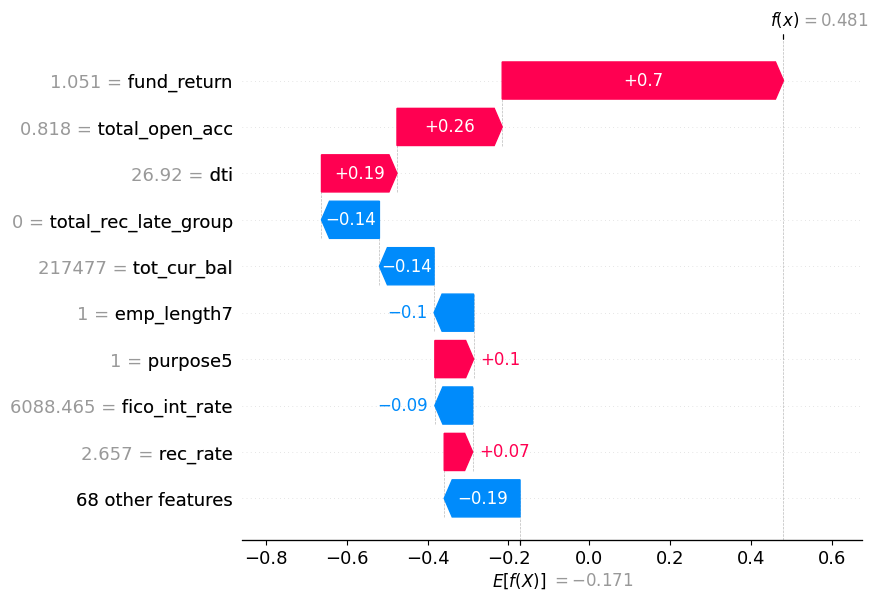

In [52]:
explainer = shap.TreeExplainer(cat_clf)
shap_values = explainer(x_test)
shap.plots.waterfall(shap_values[50])